<a href="https://colab.research.google.com/github/agdev/SDS-CP008-superstore-customer-segmentation/blob/main/notebooks/ag/AG_Cleaning_%26_Exploring_Data_SDS_CP008_superstore_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
!pip install pydantic-settings -qU
# !pip install pandas-profiling[notebook] -qU
!pip install --upgrade pandas-profiling -qU

# **Importing libraries**

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import plotly
import plotly.express as px
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from plotly import figure_factory as FF

In [124]:
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

In [125]:
import os

In [126]:
# print('os.curdir', os.curdir)
print('os.getcwd()', os.getcwd())
print('os.listdir()', os.listdir())

os.getcwd() /content
os.listdir() ['.config', '.ipynb_checkpoints', 'Sample - Superstore.csv', 'sample_data']


# **Uploading Files**

In [127]:
from google.colab import files

import io

if not os.path.exists('Sample - Superstore.csv'):
  uploaded = files.upload()
  df = pd.read_csv(io.BytesIO(uploaded['Sample - Superstore.csv']), encoding='latin1')
else:
  df = pd.read_csv(r'/content/Sample - Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **Current Features/Variables**

In [128]:
for col in df.columns:
  print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [130]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [131]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The dataset has 9994 rows and 21 columns.


# **Checking for missing values**

In [132]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


# **Checking for duplicates**

In [133]:
df.duplicated().sum()

0

# **Converting Date columns to date type**

In [134]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='mixed')
df['Ship Date']  = pd.to_datetime(df['Ship Date'],format='mixed')

# **Unique values per column**

In [135]:
print(df.nunique())

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64


In [136]:
df = df.drop(['Row ID', 'Customer Name', 'Postal Code', 'Country'], axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [137]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [138]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [139]:
print("Is index unique?")
print(df.index.is_unique)

Is index unique?
True


In [140]:
df_num = df.filter(['Sales','Quantity', 'Discount', 'Profit'], axis=1)
df_num.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [141]:
# print('Profit Max:', df_num['Profit'].max(), '\nProfit Min:', df_num['Profit'].min())
# print('Discount Max:', df_num['Discount'].max(), '\nDiscount Min:', df_num['Discount'].min())
df_num.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


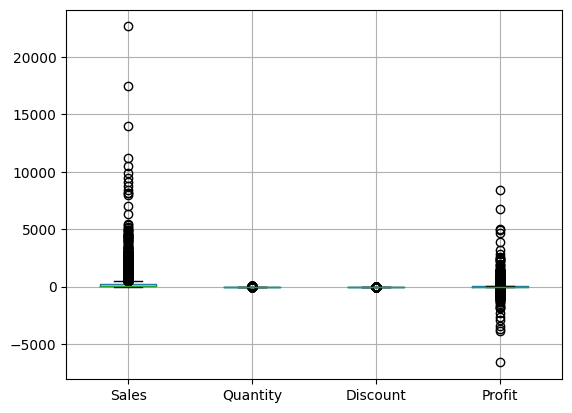

In [142]:
import matplotlib.pyplot as plt
df_num.boxplot()
plt.show()


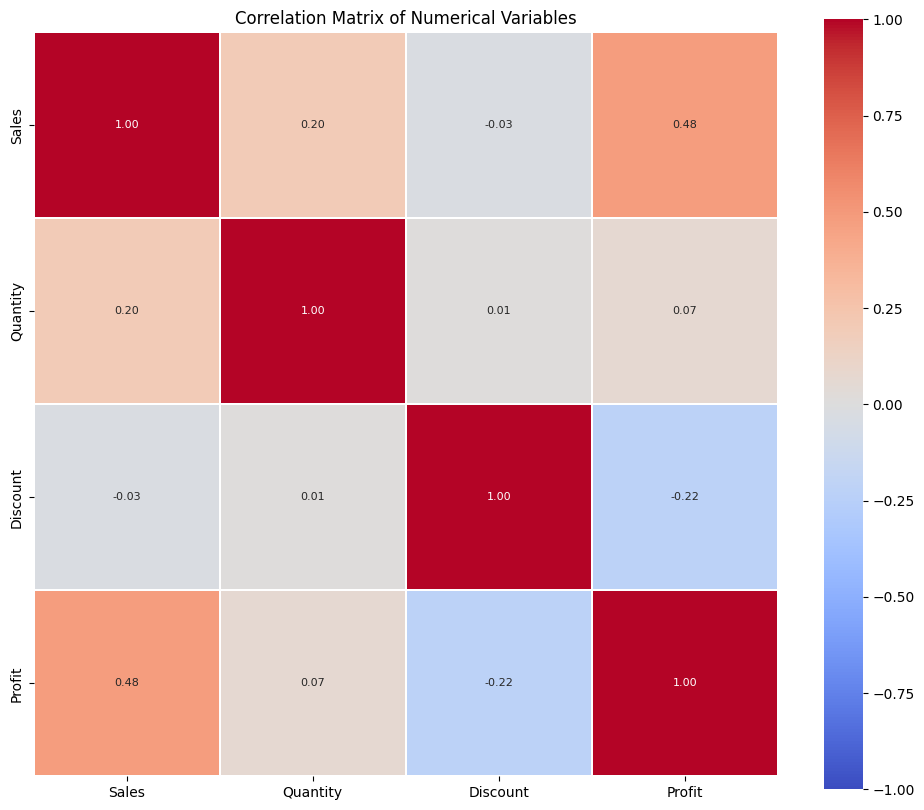

In [143]:
# Correlation matrix
correlation_matrix = df_num.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1,vmax=1.0,vmin=-1.0,annot_kws={"size": 8}, square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


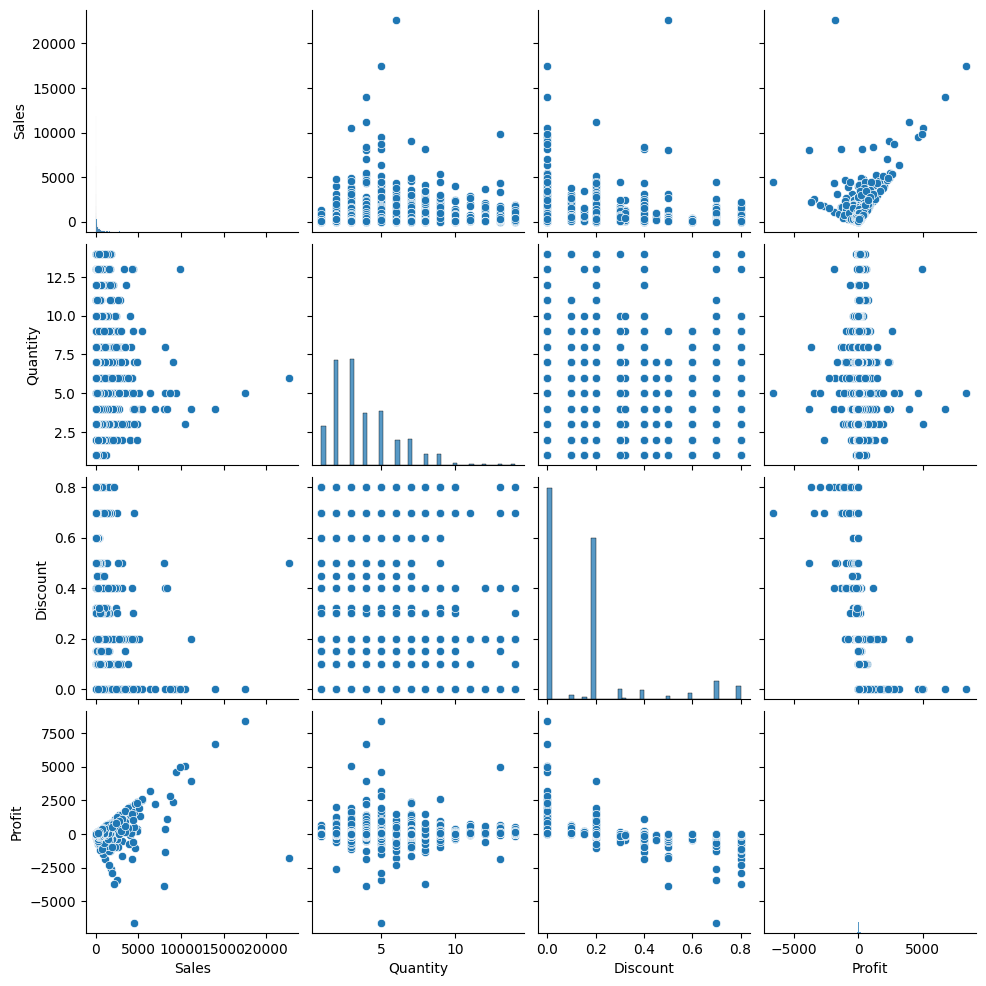

In [144]:
sns.pairplot(df_num)
plt.show()


In [145]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df, title='Pandas Profiling Report')
# profile.to_notebook_iframe()  # Or generate an HTML report

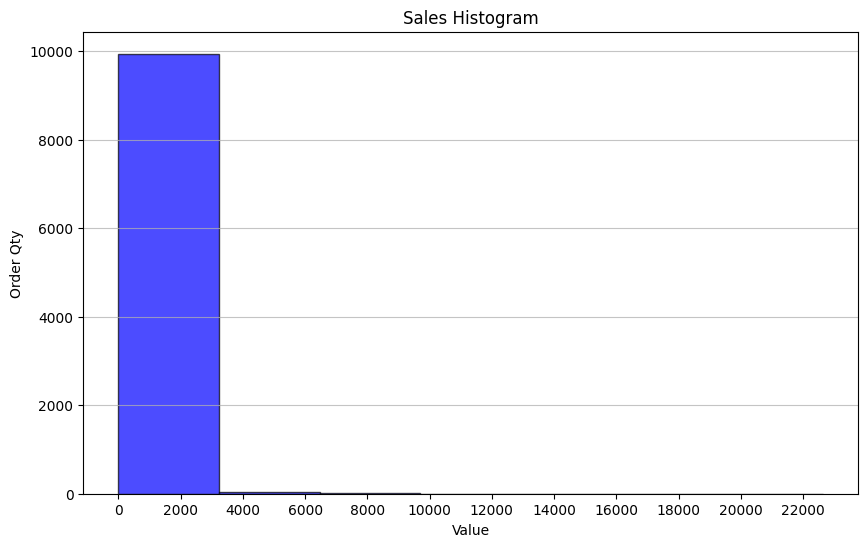

In [146]:
tick_intervals = np.arange(min(df_num['Sales']), max(df_num['Sales']), step=2000)

plt.figure(figsize=(10, 6))
plt.hist(df_num['Sales'], bins=7, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Sales Histogram')
plt.xlabel('Value')
plt.ylabel('Order Qty')
plt.xticks(tick_intervals)  # Set the custom tick intervals
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

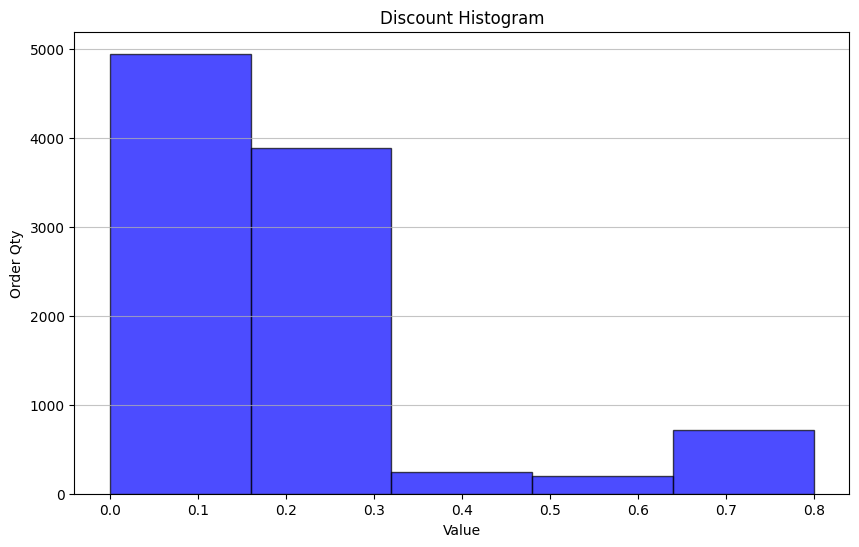

In [147]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Discount'], bins=5, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Discount Histogram')
plt.xlabel('Value')
plt.ylabel('Order Qty')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

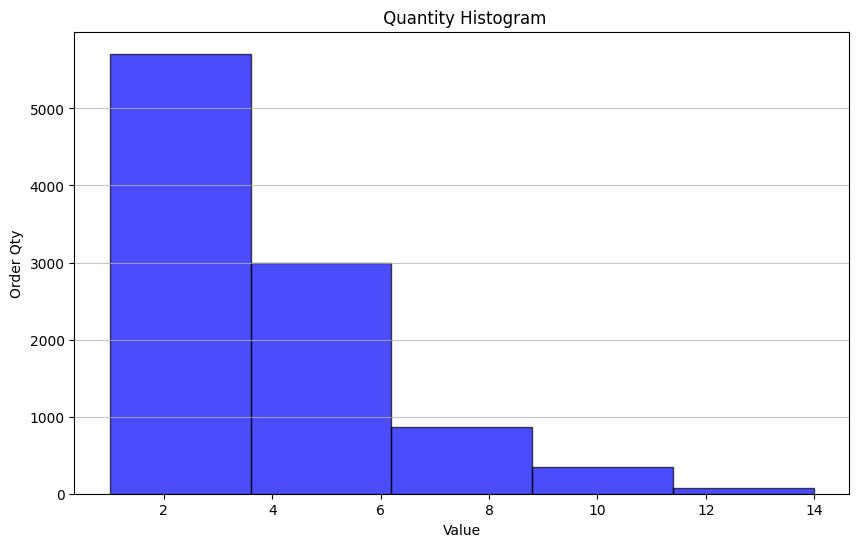

In [148]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Quantity'], bins=5, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title(' Quantity Histogram')
plt.xlabel('Value')
plt.ylabel('Order Qty')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

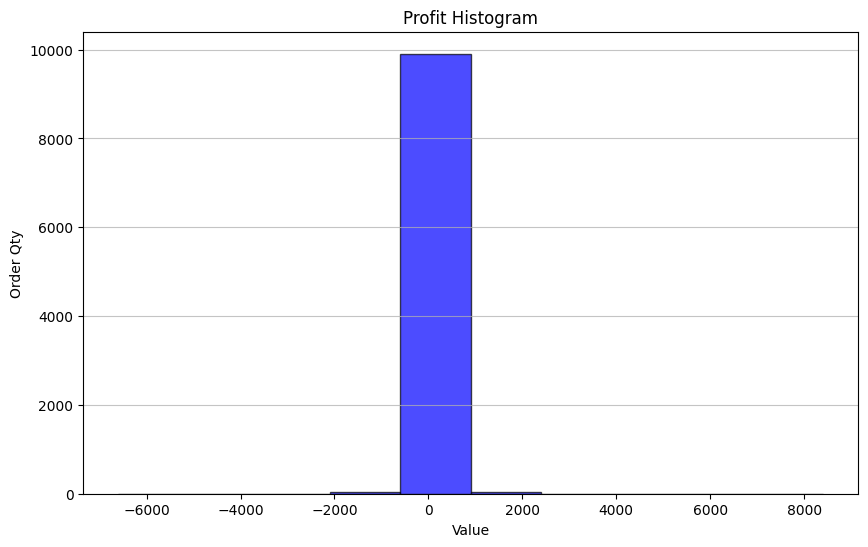

In [149]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Profit'], bins=10, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Profit Histogram')
plt.xlabel('Value')
plt.ylabel('Order Qty')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

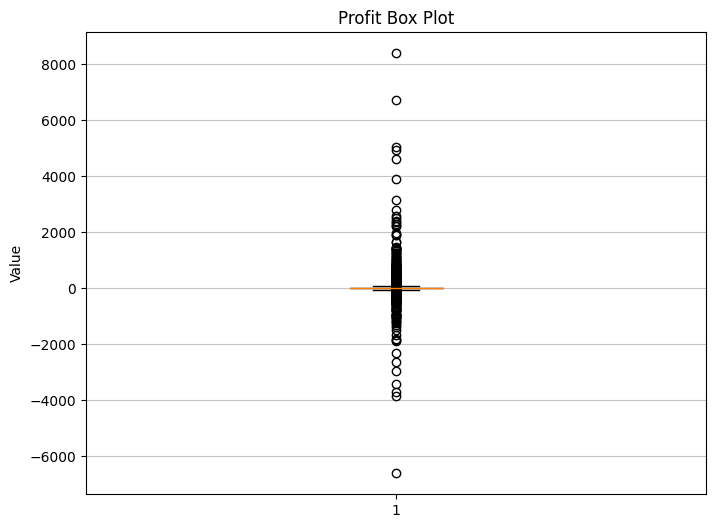

In [150]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_num['Profit'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Customize the plot
plt.title('Profit Box Plot')
plt.ylabel('Value')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

# **Getting rows with negative Profit**

In [167]:
profit_sum = df.groupby('Customer ID')['Profit'].sum()
profit_sum.head()

,Profit
Customer ID,
AA-10315,-362.8825
AA-10375,277.3824
AA-10480,435.8274
AA-10645,857.8033
AB-10015,129.3465


In [201]:
neg_profit_sum = profit_sum[profit_sum < 0]
neg_profit_sum.head()

,Profit
Customer ID,
AA-10315,-362.8825
AB-10600,-274.9604
AC-10420,-62.1342
AC-10660,-28.7004
AF-10885,-163.1175


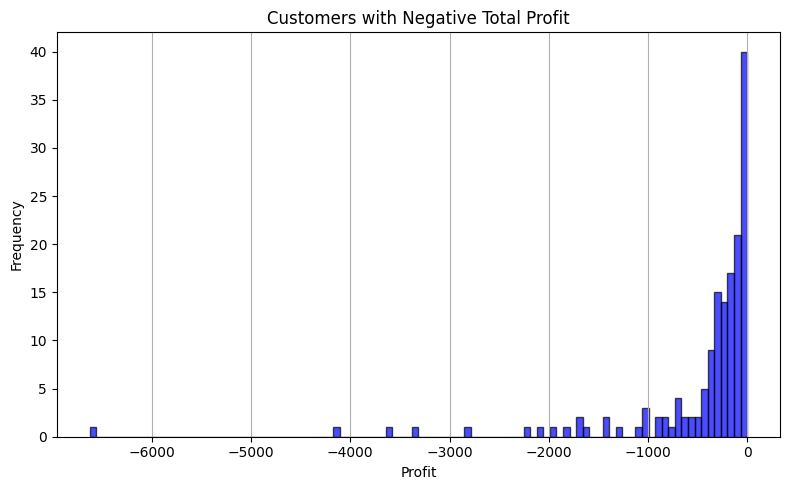

In [207]:
plt.figure(figsize=(8, 5))
neg_profit_sum.hist( bins=100, edgecolor='black', color='blue', alpha=0.7)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Customers with Negative Total Profit')
# plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

# Show plot
plt.show()

In [181]:
negative_profit_customers_ids = neg_profit_sum.index
# negative_profit_customers
negative_profit_customers_df = df[df['Customer ID'].isin(negative_profit_customers_ids)]
negative_profit_customers_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
27,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Consumer,Philadelphia,Pennsylvania,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Consumer,Philadelphia,Pennsylvania,East,OFF-BI-10000474,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...,9.6180,2,0.70,-7.0532


In [190]:
sorted_neg_proft_cust = negative_profit_customers_df.sort_values(by='Profit', ascending=True)
sorted_neg_proft_cust.head(10)
# df.isin(negative_profit_customers_series)
# negative_profit_customers
# grouped_df = df.groupby('Customer ID').filter(lambda x: x['Profit'].sum() < 0)
# grouped_df.head()
# grouped_df.shape

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7772,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Consumer,Lancaster,Ohio,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780
683,US-2017-168116,2017-11-04,2017-11-04,Same Day,GT-14635,Corporate,Burlington,North Carolina,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
9774,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Consumer,San Antonio,Texas,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
3011,CA-2017-134845,2017-04-17,2017-04-23,Standard Class,SR-20425,Home Office,Louisville,Colorado,West,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
4991,US-2017-122714,2017-12-07,2017-12-13,Standard Class,HG-14965,Corporate,Chicago,Illinois,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
3151,CA-2015-147830,2015-12-15,2015-12-18,First Class,NF-18385,Consumer,Newark,Ohio,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912
5310,CA-2017-131254,2017-11-19,2017-11-21,First Class,NC-18415,Consumer,Houston,Texas,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820
9639,CA-2015-116638,2015-01-28,2015-01-31,Second Class,JH-15985,Consumer,Concord,North Carolina,South,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124
1199,CA-2016-130946,2016-04-08,2016-04-12,Standard Class,ZC-21910,Consumer,Houston,Texas,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464
2697,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Home Office,Jacksonville,Florida,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784


In [194]:
sorted_neg_proft_cust.head(10)['Sub-Category'].unique()

array(['Machines', 'Binders', 'Tables'], dtype=object)

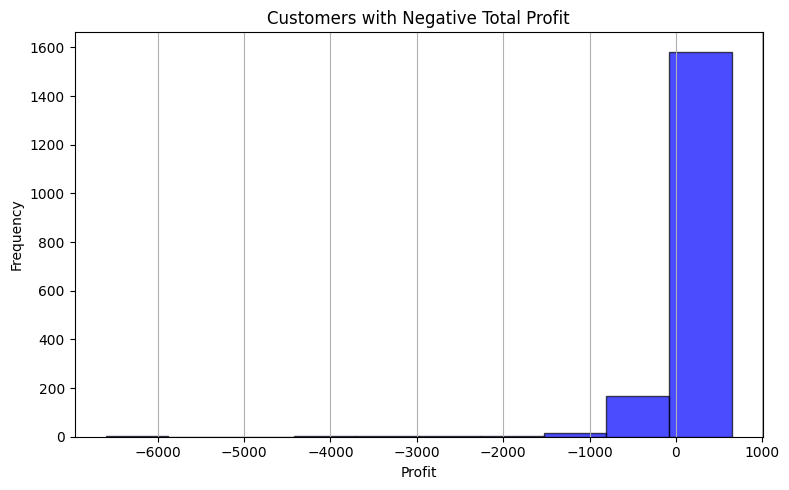

In [202]:
plt.figure(figsize=(8, 5))
# Convert the Series of negative profits for plotting
# negative_profit_customers_series = pd.Series(negative_profit_customers)
negative_profit_customers_df['Profit'].hist( bins=10, edgecolor='black', color='blue', alpha=0.7)
# negative_profit_customers_df['Profit'].plot(kind='bar', color='salmon')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Customers with Negative Total Profit')
# plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

# Show plot
plt.show()